In [28]:
#Gonna have to do attribute analysis first, then I can do statistical analysis later. 
#loading the data into the spreadsheet
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
import pandas as pd

# Replace 'file_path' with the actual file path of your CSV file
striker_file_path = '/Users/JumpMan/Desktop/FM_Analytics_Project_Feb_2024/FM24_Player_Database/Arsenal_FM24_Save/Attributes/csv/Striker_Atttributes_cleaned.csv'
# Load the CSV file into a DataFrame
striker_df = pd.read_csv(striker_file_path)

# Display the first few rows of the DataFrame
striker_df.head()

,UID,Name,Club,Position,Age,Transfer Value,Salary,Off The Ball,Stamina,Balance,...,Technique,Passing,Dribbling,Finishing,Pace,Acceleration,Agility,First Touch,Decisions,Anticipation
0,48043873.0,Randal Kolo Muani - French,Paris SG - Ligue 1 Uber Eats,"AM (RL), ST (C)",25.0,"£219,500,000.00","£175,000.00",16.0,14.0,14.0,...,15.0,13.0,17.0,15.0,17.0,17.0,16.0,15.0,14.0,16.0
1,78090138.0,Darwin Núñez - Uruguayan,Liverpool - English Premier Division,"AM (RL), ST (C)",24.0,"£226,500,000.00","£250,000.00",18.0,15.0,12.0,...,14.0,12.0,14.0,15.0,17.0,17.0,14.0,12.0,12.0,14.0
2,85140301.0,Christopher Nkunku - French,Chelsea - English Premier Division,"M (C), AM (RLC), ST (C)",26.0,"£170,500,000.00","£300,000.00",17.0,14.0,12.0,...,16.0,15.0,16.0,14.0,16.0,15.0,16.0,15.0,13.0,16.0
3,27160181.0,Rasmus Højlund - Danish,Man UFC - English Premier Division,ST (C),21.0,"£150,000,000.00","£225,000.00",14.0,15.0,17.0,...,15.0,13.0,14.0,15.0,18.0,15.0,13.0,15.0,12.0,15.0
4,28049320.0,Harry Kane - English,FC Bayern - Bundesliga,"AM (C), ST (C)",30.0,"£158,000,000.00","£350,000.00",17.0,16.0,14.0,...,17.0,18.0,14.0,19.0,14.0,12.0,12.0,15.0,18.0,15.0


In [30]:
print(striker_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', ' Transfer Value ',
       ' Salary ', 'Off The Ball', 'Stamina', 'Balance', 'Composure',
       'Workrate', 'Technique', 'Passing', 'Dribbling', 'Finishing', 'Pace',
       'Acceleration', 'Agility', 'First Touch', 'Decisions', 'Anticipation'],
      dtype='object')


In [37]:
#Calculator
#Calculator Stuff
striker_df['striker_key']= ((
    striker_df['Dribbling'] + 
    striker_df['Finishing'] + 
    striker_df['First Touch'] + 
    striker_df['Technique'] + 
    striker_df['Composure'] + 
    striker_df['Off The Ball'] + 
    striker_df['Acceleration'] 
) * 5)



striker_df['striker_important'] = ((
    striker_df['Passing'] + 
    striker_df['Decisions'] + 
    striker_df['Anticipation'] + 
    striker_df['Workrate'] + 
    striker_df['Agility'] + 
    striker_df['Balance'] +
    striker_df['Pace'] +
    striker_df['Stamina'] 
) * 4)





striker_df['striker_score'] = ((striker_df['striker_key'] + striker_df['striker_important']) / 67)
striker_df['striker_score'] = striker_df['striker_score'].round(1)


/var/folders/bf/4lyx7mbx6_x3y4pb5d93fm7h0000gp/T/ipykernel_69148/2830361166.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


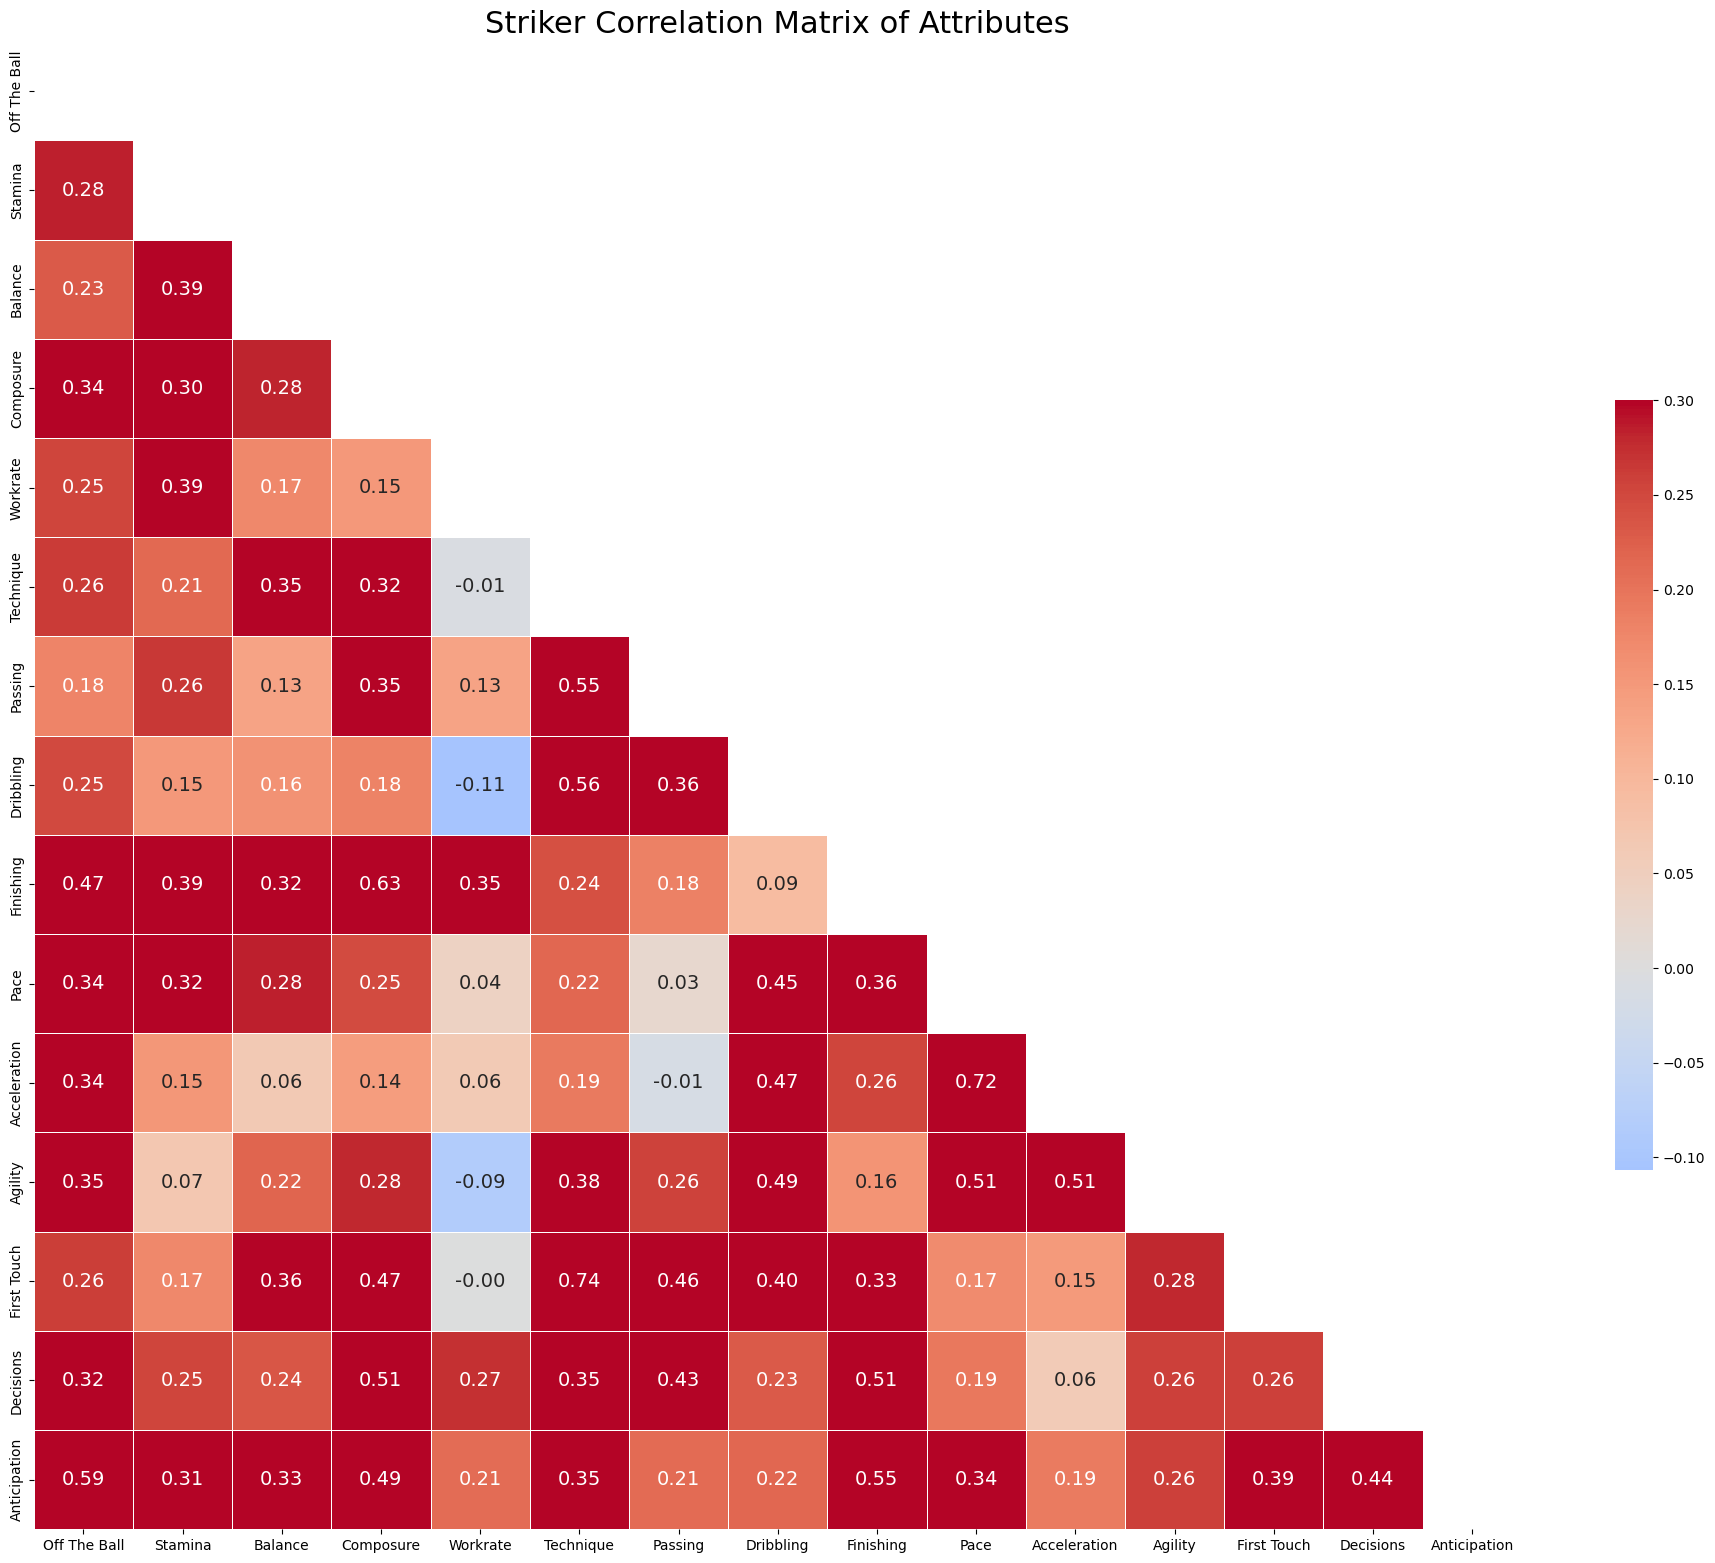

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select the columns of interest
attributes = [ 'Off The Ball', 'Stamina', 'Balance', 'Composure',
       'Workrate', 'Technique', 'Passing', 'Dribbling', 'Finishing', 'Pace',
       'Acceleration', 'Agility', 'First Touch', 'Decisions', 'Anticipation']

# Compute the correlation matrix
correlation_matrix = striker_df[attributes].corr()

# Set up the matplotlib figure
plt.figure(figsize=(24, 20))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Generate a custom sequential colormap with varying shades of blue
cmap = plt.cm.get_cmap('coolwarm')

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"fontsize":14})

plt.title('Striker Correlation Matrix of Attributes', fontsize=22)  # Increase title font size
plt.show()

In [39]:
print(striker_df.columns)

Index(['UID', 'Name', 'Club', 'Position', 'Age', ' Transfer Value ',
       ' Salary ', 'Off The Ball', 'Stamina', 'Balance', 'Composure',
       'Workrate', 'Technique', 'Passing', 'Dribbling', 'Finishing', 'Pace',
       'Acceleration', 'Agility', 'First Touch', 'Decisions', 'Anticipation',
       'striker_key', 'striker_important', 'striker_score'],
      dtype='object')


In [40]:
# Selecting the desired columns from the original DataFrame
selected_columns = ['UID', 'Name', 'Club', 'Age' ,'Position', ' Transfer Value ', ' Salary ', 'Age', 
                    'striker_key', 'striker_important', 'striker_score']

# Creating a new DataFrame with the selected columns from ball_playing_defender_df
new_striker_df = striker_df[selected_columns]

# Displaying the new DataFrame
new_striker_df.head(41)

,UID,Name,Club,Age,Position,Transfer Value,Salary,Age,striker_key,striker_important,striker_score
0,4.804387e+07,Randal Kolo Muani - French,Paris SG - Ligue 1 Uber Eats,25.0,"AM (RL), ST (C)","£219,500,000.00","£175,000.00",25.0,545.0,464.0,15.1
1,7.809014e+07,Darwin Núñez - Uruguayan,Liverpool - English Premier Division,24.0,"AM (RL), ST (C)","£226,500,000.00","£250,000.00",24.0,510.0,448.0,14.3
2,8.514030e+07,Christopher Nkunku - French,Chelsea - English Premier Division,26.0,"M (C), AM (RLC), ST (C)","£170,500,000.00","£300,000.00",26.0,545.0,456.0,14.9
3,2.716018e+07,Rasmus Højlund - Danish,Man UFC - English Premier Division,21.0,ST (C),"£150,000,000.00","£225,000.00",21.0,505.0,480.0,14.7
4,2.804932e+07,Harry Kane - English,FC Bayern - Bundesliga,30.0,"AM (C), ST (C)","£158,000,000.00","£350,000.00",30.0,560.0,492.0,15.7
5,1.411066e+07,Lautaro Martínez - Argentinian,Inter - Italian Serie A,26.0,ST (C),"£154,000,000.00","£185,000.00",26.0,560.0,496.0,15.8
6,4.316165e+07,Federico Chiesa - Italian,Juventus - Italian Serie A,26.0,"M (L), AM (RL), ST (C)","£123,000,000.00","£155,000.00",26.0,535.0,440.0,14.6
7,1.930693e+07,Rodrygo - Brazilian,R. Madrid - Spanish First Division,23.0,"M (R), AM (RL), ST (C)","£111,500,000.00","£200,000.00",23.0,565.0,492.0,15.8
8,9.307029e+07,Alexander Isak - Swedish,Newcastle - English Premier Division,24.0,ST (C),"£113,000,000.00","£120,000.00",24.0,555.0,464.0,15.2
9,5.106795e+07,Santiago Giménez - Mexican,Feyenoord - Eredivisie,23.0,ST (C),"£100,000,000.00","£21,500.00",23.0,495.0,456.0,14.2


In [49]:
import pandas as pd

# Assuming striker_df and selected_columns are defined earlier

# Creating a new DataFrame with the selected columns from striker_df
new_striker_df = striker_df[selected_columns]

# Sort the DataFrame based on 'striker_score' in descending order
new_striker_df = new_striker_df.sort_values(by='striker_score', ascending=False)

# Create an empty string to store the HTML content
html_content = "<h1>Striker Attribute Analysis</h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Striker Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in new_striker_df.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player[' Transfer Value ']}</td><td>{player[' Salary ']}</td><td>{player['striker_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("Striker Attribute Analysis 1st report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [44]:
import pandas as pd

# Assuming you already have the DataFrame 'dlp_df' containing the data

# Group the DataFrame by 'Age' and find the player with the highest 'dlp_score' in each age group
best_striker_by_age = striker_df.groupby('Age').apply(lambda x: x.loc[x['striker_score'].idxmax()])

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', ' Transfer Value ', ' Salary ', 'winger_score']

# Create an HTML report
html_content = "<h1>Best Winger by Age </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>striker Score</th></tr>"

# Iterate over each row in the grouped DataFrame
for index, player in best_striker_by_age.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player[' Transfer Value ']}</td><td>{player[' Salary ']}</td><td>{player['striker_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_striker_by_age_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.


In [45]:
import pandas as pd

# Assuming you already have the DataFrame 'am_df' containing the data

# Filter the DataFrame to include only players who are under 23 years old
u23_players = striker_df[striker_df['Age'] < 23]

# Sort the DataFrame by 'am_score' in descending order to rank the players
u23_players_ranked = u23_players.sort_values(by='striker_score', ascending=False)

# Select the desired columns for the report
report_columns = ['Name', 'Club', 'Age', 'Position', ' Transfer Value ', ' Salary ', 'striker_score']

# Create an HTML report
html_content = "<h1>Best U23 Striker </h1>"
html_content += "<table border='1'><tr><th>Name</th><th>Club</th><th>Age</th><th>Position</th><th>Transfer Value</th><th>Salary</th><th>Striker Score</th></tr>"

# Iterate over each row in the DataFrame
for index, player in u23_players_ranked.iterrows():
    # Add a new row to the HTML table
    html_content += f"<tr><td>{player['Name']}</td><td>{player['Club']}</td><td>{player['Age']}</td><td>{player['Position']}</td><td>{player[' Transfer Value ']}</td><td>{player[' Salary ']}</td><td>{player['striker_score']}</td></tr>"

# Close the HTML table tag
html_content += "</table>"

# Save the HTML content to a file
with open("best_u23_striker_report.html", "w") as file:
    file.write(html_content)

print("HTML report generated successfully.")


HTML report generated successfully.
